# Plotting Globular Cluster Data
In this notebook, we set up a python code to plot and analyze globular cluster data.

First, we need to import useful python libraries: numpy has a lot of math routines and we need matplotlib.pyplot to make plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now we need some GC data. The Hubble Space Telescope has observed globular clusters for decades now, and in particular, the ACS Globular Cluster Survey is available online at https://archive.stsci.edu/prepds/acsggct/ . 
If you click on "via browser" you can see a list of folders for every globular cluster of the survey. Each folder contains the raw image from Hubble (the fits file) and a table. The table is a list of all the stars in the image with their position in pixels and RA and Dec and their fluxes in V and I.

We downloaded a file for the cluster NGC 104 (also called 47 Tucanae) and now we load it. Numpy has a routine called genfromtxt that load tables from files into a matrix:

In [2]:
odata47=np.genfromtxt("hlsp_acsggct_hst_acs-wfc_ngc0104_r.rdviq.cal.adj.zpt.bz2",names=True,unpack=True)

With the option "unpack=True" the table is transposed, so that data[n] is the nth column. Also, with the option "names=True", the field names are read from the first line, so that for example to access the 4th column (which is the Vvega one), you can also write data['Vvega'].

Now we want to plot the color-magnitude diagram. We use the matplotlib routine 'scatter', which makes a scatter plot. The option 's=#' changes the size of the dots, the commands 'plt.xlim' and 'plt.ylim' determine the x- and y-axis range and the command 'plt.show( )' makes the plot.

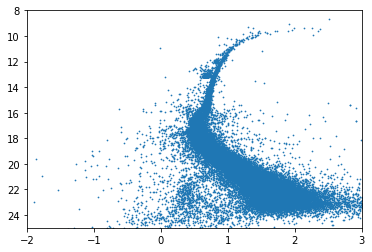

In [3]:
plt.scatter(odata47['VIvega'],odata47['Ivega'],s=0.5)
plt.xlim(-2,3)
plt.ylim(25,8)
plt.show()

The file history1M.data is the history.data file from the 1M_pre_ms_to_wd suite that we ran on the first day. As we will learn in the following lecture, the output from MESA is not enough and it needs to be converted into observable quantities, like the ones we are plotting in the CMD: flux in the V and in the I band. The following line takes care of that, "painting" the history.data file with the colors from an atmosphere table:

In [4]:
run ./paintisochrone.py history1M.data colmag.BT-Settl.all.Ours-Castelli.VegaM+0.00.txt paintedhistory1M.data

The generated file, paintedhistory1M.data, contains, for each star, the flux emitted in many telescopes bands, including Hubble's V and I (F606W and F814W).

In [5]:
pdata=np.genfromtxt("paintedhistory1M.data",names=True,skip_header=1,unpack=True)

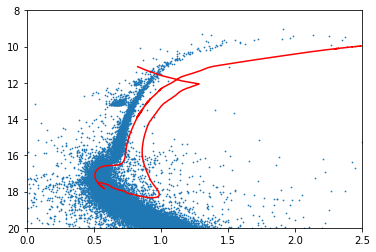

In [6]:
plt.scatter(odata47['VIvega'],odata47['Ivega'],s=0.5)
plt.plot(pdata['F606W']-pdata['F814W'],pdata['F814W']+13.3,c='r')
plt.xlim(0,2.5)
plt.ylim(20,8)
plt.show()

In [7]:
run ./paintisochrone.py history09M.data colmag.BT-Settl.all.Ours-Castelli.VegaM-0.50.txt paintedhistory09M.data

In [8]:
pdata9=np.genfromtxt("paintedhistory09M.data",names=True,skip_header=1,unpack=True)
pdata1=np.genfromtxt("paintedhistory1M.data",names=True,skip_header=1,unpack=True)

# The Whole CMD

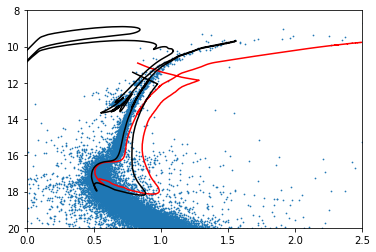

In [9]:
plt.scatter(odata47['VIvega'],odata47['Ivega'],s=0.5)
plt.plot(pdata1['F606W']-pdata1['F814W'],pdata1['F814W']+13.1,c='r')
plt.plot(pdata9['F606W']-pdata9['F814W']+0.03,pdata9['F814W']+13.5,c='k')
# the whole CMD
plt.xlim(0.0,2.5)
plt.ylim(20,8)
plt.show()

# Highlight Sub-Giant Branch and Turn-Off

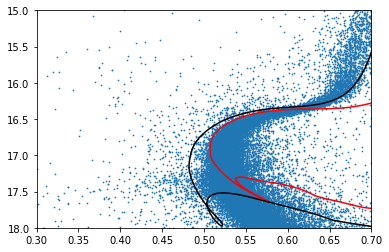

In [10]:
plt.scatter(odata47['VIvega'],odata47['Ivega'],s=0.5)
plt.plot(pdata1['F606W']-pdata1['F814W'],pdata1['F814W']+13.1,c='r')
plt.plot(pdata9['F606W']-pdata9['F814W']+0.03,pdata9['F814W']+13.5,c='k')
# Highlight Sub-Giant Branch and Turn-Off
plt.xlim(0.3,0.7)
plt.ylim(18,15)
plt.show()

Add a marker for when hydrogen is exhausted in the core for the two models.
This information isn't in the painted history file so we have to load the MESA history.

In [11]:
data1=np.genfromtxt("history1M.data",names=True,skip_header=5,unpack=True)
data9=np.genfromtxt("history09M.data",names=True,skip_header=5,unpack=True)

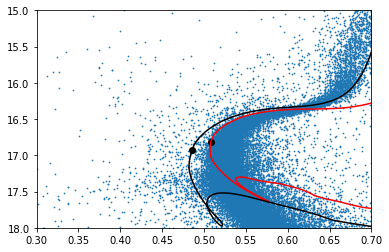

In [12]:
plt.scatter(odata47['VIvega'],odata47['Ivega'],s=0.5)
plt.plot(pdata1['F606W']-pdata1['F814W'],pdata1['F814W']+13.1,c='r')
plt.plot(pdata9['F606W']-pdata9['F814W']+0.03,pdata9['F814W']+13.5,c='k')
plt.scatter((pdata1['F606W'][data1['center_h1']<1e-3]-pdata1['F814W'][data1['center_h1']<1e-3])[0],
            pdata1['F814W'][data1['center_h1']<1e-3][0]+13.1,c='k')
plt.scatter((pdata9['F606W'][data9['center_h1']<1e-3]-pdata9['F814W'][data9['center_h1']<1e-3])[0]+0.03,
            pdata9['F814W'][data9['center_h1']<1e-3][0]+13.5,c='k')
plt.xlim(0.3,0.7)
plt.ylim(18,15)
plt.show()

# Highlight red-giant branch

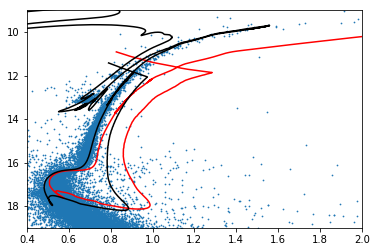

In [13]:
plt.scatter(odata47['VIvega'],odata47['Ivega'],s=0.5)
plt.plot(pdata1['F606W']-pdata1['F814W'],pdata1['F814W']+13.1,c='r')
plt.plot(pdata9['F606W']-pdata9['F814W']+0.03,pdata9['F814W']+13.5,c='k')
plt.xlim(0.4,2)
plt.ylim(19,9)
plt.show()

# Highlight Red Clump and Red Bump

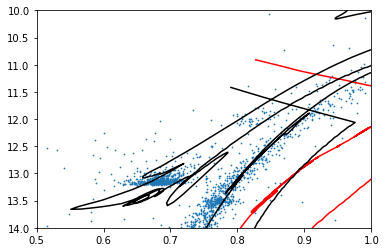

In [14]:
plt.scatter(odata47['VIvega'],odata47['Ivega'],s=0.5)
plt.plot(pdata1['F606W']-pdata1['F814W'],pdata1['F814W']+13.1,c='r')
plt.plot(pdata9['F606W']-pdata9['F814W']+0.03,pdata9['F814W']+13.5,c='k')
plt.xlim(0.5,1)
plt.ylim(14,10)
plt.show()

# Hyades
The open cluster is younger than the globular cluster 47 Tucanae.  Let's use some higher mass models.  First we will add the absolute magnitudes to the histories.

In [15]:
run ./paintisochrone.py history2M.data colmag.BT-Settl.all.Ours-Castelli.VegaM+0.00.txt paintedhistory2M.data

In [16]:
run ./paintisochrone.py history14M.data colmag.BT-Settl.all.Ours-Castelli.VegaM+0.00.txt paintedhistory14M.data

In [17]:
pdata14=np.genfromtxt("paintedhistory14M.data",names=True,skip_header=1,unpack=True)
pdata2=np.genfromtxt("paintedhistory2M.data",names=True,skip_header=1,unpack=True)

In [18]:
odataHy=np.genfromtxt("Hyades_cmd.data",names=True,unpack=True)

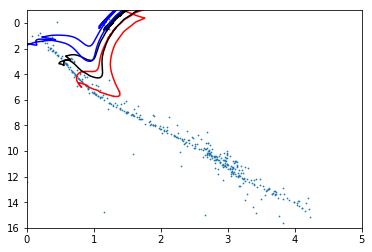

In [19]:
plt.scatter(odataHy['GBr_GRr'],odataHy['G'],s=0.5)
plt.plot(pdata1['GAIA_GAIA2rGbp']-pdata1['GAIA_GAIA2rGrp'],pdata1['GAIA_GAIA2rG'],c='r')
plt.plot(pdata14['GAIA_GAIA2rGbp']-pdata14['GAIA_GAIA2rGrp'],pdata14['GAIA_GAIA2rG'],c='k')
plt.plot(pdata2['GAIA_GAIA2rGbp']-pdata2['GAIA_GAIA2rGrp'],pdata2['GAIA_GAIA2rG'],c='b')
plt.xlim(0,5)
plt.ylim(16,-1)
plt.show()

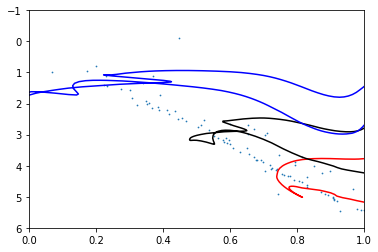

In [20]:
plt.scatter(odataHy['GBr_GRr'],odataHy['G'],s=0.5)
plt.plot(pdata1['GAIA_GAIA2rGbp']-pdata1['GAIA_GAIA2rGrp'],pdata1['GAIA_GAIA2rG'],c='r')
plt.plot(pdata14['GAIA_GAIA2rGbp']-pdata14['GAIA_GAIA2rGrp'],pdata14['GAIA_GAIA2rG'],c='k')
plt.plot(pdata2['GAIA_GAIA2rGbp']-pdata2['GAIA_GAIA2rGrp'],pdata2['GAIA_GAIA2rG'],c='b')
plt.xlim(0,1)
plt.ylim(6,-1)
plt.show()

# Turn Off Ages
Determine when the hydrogen in the centre of the star is exhausted for the three models.  These data are located in the history files, so we have to load them too.

In [21]:
data1=np.genfromtxt("history1M.data",names=True,skip_header=5,unpack=True)

We select the models when the hydrogen in the centre is depleted.  And get the time of the first one.  This is the time of the turn-off as we shall see.

In [22]:
ff=data1['star_age'][data1['center_h1']<1e-3]
ff[0]

8782173812.7214756

In [23]:
data14=np.genfromtxt("history14M.data",names=True,skip_header=5,unpack=True)

In [24]:
ff=data14['star_age'][data14['center_h1']<1e-3]
ff[0]

2679149607.4549294

In [25]:
data2=np.genfromtxt("history2M.data",names=True,skip_header=5,unpack=True)

In [26]:
ff=data2['star_age'][data2['center_h1']<1e-3]
ff[0]

944257101.09716332

Let's plot the hydrogen exhaustion points for the various models on the CMD

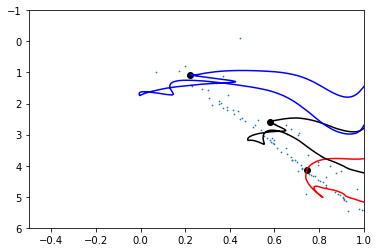

In [27]:
plt.scatter(odataHy['GBr_GRr'],odataHy['G'],s=0.5)
plt.plot(pdata1['GAIA_GAIA2rGbp']-pdata1['GAIA_GAIA2rGrp'],pdata1['GAIA_GAIA2rG'],c='r')
plt.scatter((pdata1['GAIA_GAIA2rGbp'][data1['center_h1']<1e-3]-pdata1['GAIA_GAIA2rGrp'][data1['center_h1']<1e-3])[0],
            pdata['GAIA_GAIA2rG'][data1['center_h1']<1e-3][0],c='k')
plt.plot(pdata14['GAIA_GAIA2rGbp']-pdata14['GAIA_GAIA2rGrp'],pdata14['GAIA_GAIA2rG'],c='k')
plt.scatter((pdata14['GAIA_GAIA2rGbp'][data14['center_h1']<1e-3]-pdata14['GAIA_GAIA2rGrp'][data14['center_h1']<1e-3])[0],
            pdata14['GAIA_GAIA2rG'][data14['center_h1']<1e-3][0],c='k')
plt.plot(pdata2['GAIA_GAIA2rGbp']-pdata2['GAIA_GAIA2rGrp'],pdata2['GAIA_GAIA2rG'],c='b')
plt.scatter((pdata2['GAIA_GAIA2rGbp'][data2['center_h1']<1e-3]-pdata2['GAIA_GAIA2rGrp'][data2['center_h1']<1e-3])[0],
            pdata2['GAIA_GAIA2rG'][data2['center_h1']<1e-3][0],c='k')
plt.xlim(-0.5,1)
plt.ylim(6,-1)
plt.show()